In [ ]:
!python --version

Python 3.10.12


In [ ]:
pip install tensorflow

In [1]:
import keras


In [2]:
import numpy as np


In [ ]:
pip install keras

In [ ]:
import numpy as np

In [ ]:
np.__version__

'1.25.2'

In [3]:
import cv2

In [4]:
exit()

In [2]:
import os
import cv2
import numpy as np
from imutils import paths

In [ ]:
pip install imutils

In [3]:
from sklearn.preprocessing import LabelBinarizer

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datapath=r"E:\Developement\DeepLearning project\data"
outputModel=r"E:\Developement\DeepLearning project\videoClassificationModel\videoClassificationModel"
outputLabelBinarizer="E:\Developement\DeepLearning project\videoClassificationModel\videoClassificationBinaryzer"
epoch=25
print(datapath)

In [6]:
datapath=r"/content/drive/My Drive/data"
outputModel=r"/content/drive/My Drive/DeepLearning project/videoClassificationModel/videoClassificationModel"
outputLabelBinarizer="/content/drive/My Drive/DeepLearning project/videoClassificationModel/videoClassificationBinaryzer"
epoch=25

In [7]:
sports_Label=set(['boxing','swimming','table_tennis'])
print("Image is being loaded......")
pathToImages=list(paths.list_images(datapath))
data=[]
labels=[]

for image in pathToImages:
    label = image.split(os.path.sep)[-2]
    if label not in sports_Label:
        continue
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Corrected function name
    image = cv2.resize(image, (244, 244))
    data.append(image)
    labels.append(label)

Image is being loaded......


In [8]:
data=np.array(data)
labels=np.array(labels)
#hardencoded value as 0,1,2
lb=LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
(x_train,x_test,y_train,y_test)=train_test_split(data,labels,test_size=0.25,stratify=labels,random_state=42)

In [10]:
traininAugmentation=ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
validationAugmentation = ImageDataGenerator()
mean=np.array([123.68, 116.779, 103.939], dtype="float32")


traininAugmentation.mean = mean
validationAugmentation.mean = mean

In [11]:
from keras.applications import ResNet50

from keras.layers import Input
from keras.layers import AveragePooling2D

from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.layers import Dropout
from keras.models import Model


In [12]:
baseModel = ResNet50(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,244,3)))
headModel = baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name="flatten")(headModel)
headModel=Dense(512,activation="relu")(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(len(lb.classes_),activation="softmax")(headModel)
model=Model(inputs=baseModel.input,outputs=headModel)
for baseModelLayers in baseModel.layers:
  baseModelLayers.trainable=False

94765736/94765736 [==============================] - 2s 0us/step


In [13]:
from keras.optimizers import SGD

if the output comes false then make change here


In [14]:
opt = SGD(learning_rate=0.0001, momentum=0.9)

In [15]:
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [16]:
History=model.fit_generator(
    traininAugmentation.flow(x_train,y_train,batch_size=32),
    steps_per_epoch=len(x_train)//32,
    validation_data=validationAugmentation.flow(x_test,y_test),
    validation_steps=len(x_test)//32,
    epochs=epoch
)

<ipython-input-16-5122173460a8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History=model.fit_generator(


Epoch 1/25
49/49 [==============================] - 548s 11s/step - loss: 1.1892 - accuracy: 0.5032 - val_loss: 0.5315 - val_accuracy: 0.8047
Epoch 2/25
49/49 [==============================] - 536s 11s/step - loss: 0.7163 - accuracy: 0.7042 - val_loss: 0.3606 - val_accuracy: 0.8652
Epoch 3/25
49/49 [==============================] - 497s 10s/step - loss: 0.5213 - accuracy: 0.7862 - val_loss: 0.2821 - val_accuracy: 0.9102
Epoch 4/25
49/49 [==============================] - 520s 11s/step - loss: 0.4519 - accuracy: 0.8195 - val_loss: 0.2592 - val_accuracy: 0.9082
Epoch 5/25
49/49 [==============================] - 516s 11s/step - loss: 0.3866 - accuracy: 0.8483 - val_loss: 0.2186 - val_accuracy: 0.9219
Epoch 6/25
49/49 [==============================] - 516s 11s/step - loss: 0.3673 - accuracy: 0.8611 - val_loss: 0.1909 - val_accuracy: 0.9336
Epoch 7/25
49/49 [==============================] - 522s 11s/step - loss: 0.3341 - accuracy: 0.8707 - val_loss: 0.1830 - val_accuracy: 0.9277
Epoch 

In [17]:
import matplotlib.pyplot as plt
import pickle

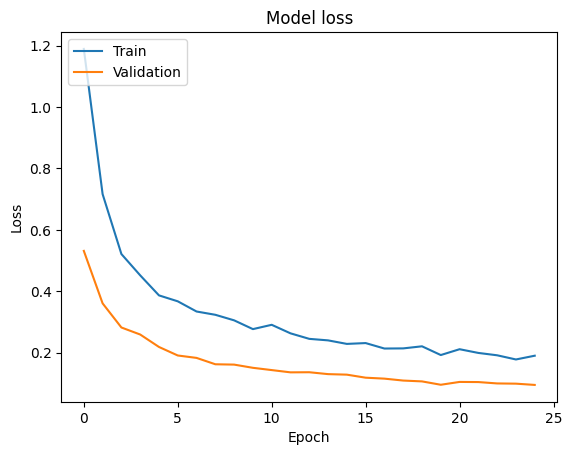

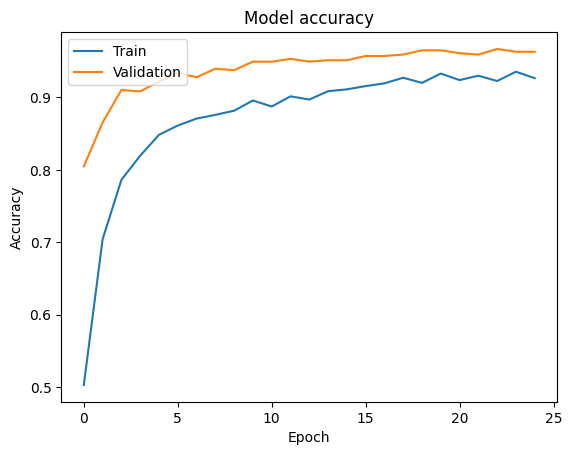

In [19]:
directory = '/content/drive/My Drive/DeepLearning project/model/'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot training & validation loss values
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(os.path.join(directory, 'model_loss.png'))  # Save the plot to Google Drive
plt.show()

# Plot training & validation accuracy values
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(os.path.join(directory, 'model_accuracy.png'))  # Save the plot to Google Drive
plt.show()


In [20]:
model.save(outputModel)
lbinarizer=open("/content/drive/My Drive/DeepLearning project/model/videoclassificationbinarizer.pickle","wb")
lbinarizer.write(pickle.dumps(lb))
lbinarizer.close()